In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [4]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [5]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

word_dict = word_dictionary([
    'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [6]:
word_dict['Album_type']

{'album': 0, nan: nan, 'single': 2, 'compilation': 3}

In [7]:
df_train.tail(40)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
17130,0.0,0.985075,2.0,-24.726,0.0337,6.814720e-01,0.001360,0.241804,0.0000,82.572,...,White Noise Calming Piano Melodies,NaN,NaN,https://www.youtube.com/watch?v=YU0H88DRnMg,NaN,Provided to YouTube by Revelator Ltd.\n\nWhite...,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,Finneas O'Connell,Post Malone
17131,8.0,0.313047,9.0,-5.516,0.0410,1.381884e-01,0.000015,0.000890,0.2040,119.932,...,Sie weiß (feat. Mero),spotify:track:7DyDjhZMEIK5Ied4juTCyc,NaN,NaN,6836.0,„Sie weiß“ jetzt überall STREAMEN: \nhttps://A...,AYLIVA x MERO - Sie weiß (prod. by Frio & Kyree),AYLIVA,Juicy J,Phoebe Bridgers
17132,4.0,0.096072,5.0,-7.159,0.0374,2.744000e-03,0.000000,0.018191,0.0758,77.525,...,Weisses Herz,spotify:track:1kKvfCmzXzRcfszwQrXFPM,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=3T6pp6bH9HE,3561.0,NaN,AYLIVA - Bei Nacht (prod. by masri),AYLIVA,Louis Bell,NaN
17133,4.0,NaN,2.0,-8.914,0.0613,2.500470e-01,0.000000,0.000359,0.3400,155.110,...,Weisses Herz,spotify:track:41x0eQ9FsOeUNyoqjLJtAX,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=e36m_R5SfkA,38.0,Provided to YouTube by Whiteheart Records/WM G...,Gott sei Dank,NaN,Finneas O'Connell,deadmau5
17134,7.0,NaN,4.0,-7.749,0.0478,1.471980e-04,0.000000,0.001191,0.3070,89.940,...,NaN,spotify:track:0JTz8ZeBJtnjRIWiJnHFdO,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,5356.0,„Was Besseres“ jetzt überall STREAMEN: \nhttps...,AYLIVA x MUDI - Was Besseres (Official Video),AYLIVA,Mike Dean,Sufjan Stevens
17135,3.0,NaN,9.0,NaN,0.0504,7.880599e-03,0.000000,0.001093,0.0728,82.773,...,Weisses Herz,spotify:track:2jExme1T0ORJ0tL3pq5dhs,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=SU6xmOp8FYY,2487.0,„Schmetterlinge“ jetzt überall STREAMEN: \nhtt...,AYLIVA - Schmetterlinge (prod. by Lee),NaN,Yeti Beats,Kamasi Washington
17136,3.0,0.143878,9.0,NaN,0.0401,1.619428e-02,0.000788,0.040354,NaN,120.105,...,Während du,spotify:track:5MUS9tGxfXLphZRAcyyWnC,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,NaN,2533.0,„Während du“ jetzt überall STREAMEN: \nhttps:/...,AYLIVA - Während du (prod. by masri),AYLIVA,NaN,The Chainsmokers
17137,6.0,0.229221,1.0,-6.998,0.2080,1.860963e-02,0.000000,0.000654,NaN,170.179,...,Weisses Herz,spotify:track:2g4FPrvea8sYly3ihGRgwE,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=H-MiQVcuxGs,5100.0,„Deine Schuld“ jetzt überall STREAMEN: https:/...,AYLIVA - Deine Schuld (prod. by Blurry & Babyb...,AYLIVA,NaN,FKA twigs
17138,6.0,0.273359,10.0,-4.984,0.0575,6.545083e-02,0.000000,0.002147,0.1110,92.903,...,Weisses Herz,spotify:track:3N1jiT8HQrhJQpwfLvy0hA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=QoTipwnUQZg,5035.0,„Bleib“ jetzt überall STREAMEN: \nhttps://AYLI...,"AYLIVA x MILANO - Bleib (prod. by Sonnek, Tyme)",AYLIVA,Louis Bell,Kanye West
17139,5.0,0.024897,NaN,-10.017,0.0347,1.522733e-01,0.000000,0.005268,0.2390,NaN,...,Weisses Herz,spotify:track:3ahWkIbu2Tl56O75Z4HvXP,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,https://www.youtube.com/watch?v=8ag1FdNfEck,NaN,Provided to YouTube by Whiteheart Records/WM G...,Was du nicht weisst,AYLIVA - Topic,Yeti Beats,NaN


In [8]:
for x in df_train['Uri'].values:
    print(x)

spotify:track:7njAZhca4o80qQdCgyEWya
spotify:track:2nnXe7n3Vivs7OfQKRsfWD
spotify:track:0VQMAup2VdeQWLCvM14Uz2
spotify:track:1M2nd8jNUkkwrc1dgBPTJz
spotify:track:2Ms33RTRCT6gArrpcrPxmo
nan
spotify:track:4lO57zZGFcj7vSY4QhfVDq
spotify:track:5NlFXQ0si6U87gXs6hq81B
spotify:track:0SLtqCrXBRrnkxSOMA3X4W
nan
spotify:track:7jBePLCZlKuEUc3rSc6izU
spotify:track:4dZ3V71vsqSn9MJ18y8YaJ
spotify:track:6yM5jM2eAq3k8NojZ7dLp1
spotify:track:0V5cvmTKsYmF5FmGGEAfmS
spotify:track:18oB9NlhCMSzlte5KAj5tl
spotify:track:5fqYqPWlfQhIkcUY3XAJlm
nan
spotify:track:1GIPP103zfsythULEpsmdw
spotify:track:5sQumEFLTZ7OWMbKg7Pq0J
spotify:track:1e1a7eAlICks9mch3UVsEH
nan
spotify:track:3VtlSKbs0IjVeeRV4otHNT
spotify:track:1gZ7i4qxXkHZb1r6eioaAP
spotify:track:0YImOCkIJ2PWhCXaURCZnY
spotify:track:7gKgd0P3dAAePiSQQBqrlf
spotify:track:1NHwvBmrUje4L1dxfWnXCH
spotify:track:0bzX26mfmUi0djOLemE2b8
spotify:track:47wZfF4OdME3xkIPhhpSSF
spotify:track:3HVJbdz0V402U5YggQK4Ao
spotify:track:6OquGsVTLqZHyxqG0PLwFz
spotify:track:0xDxS2g7

In [9]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [10]:
df_train_embedding = data_convert(df_train, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [11]:
df_test_embedding = data_convert(df_test, word_dict)

Album_type
Licensed
official_video
Track
Album
Uri
Url_spotify
Url_youtube
Description
Title
Channel
Composer
Artist


In [12]:
obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# print(int_columns)
# convert integer columns to float
df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)

/tmp/ipykernel_784/2578188673.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)


In [151]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


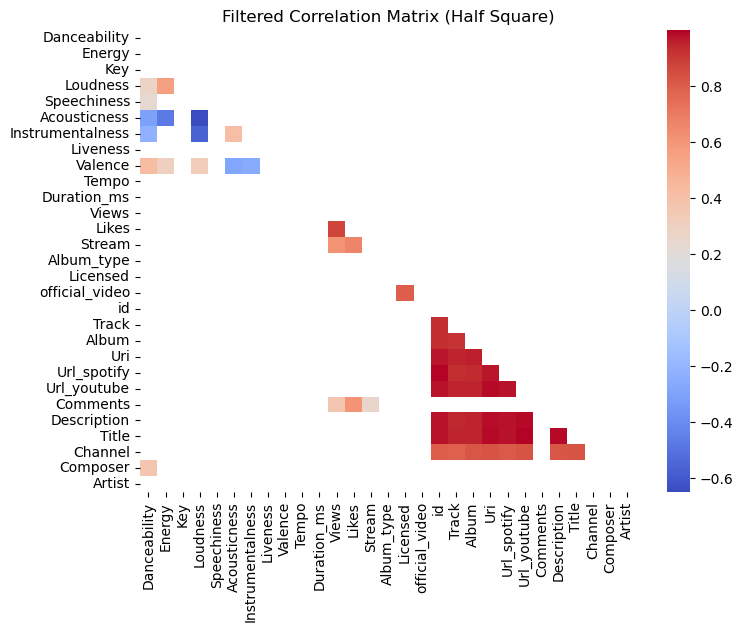

In [14]:
corr_matrix_with_threshold(df_train_embedding, 0.2)

In [15]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [16]:
arr_NOT_important_column = ['Uri', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

In [17]:
df_train_embedding_important

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Views,Likes,Stream,Album_type,Track,Url_spotify,Comments,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,...,NaN,137622.0,19981370.0,0.0,NaN,0.0,3070.0,0.0,NaN,0.0
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,...,184825.0,5190.0,NaN,NaN,1.0,0.0,122.0,1.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,...,184825.0,5190.0,19320810.0,NaN,2.0,0.0,122.0,1.0,1.0,2.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,...,202457327.0,997035.0,399661898.0,0.0,3.0,1.0,24350.0,2.0,2.0,3.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,...,316688049.0,1299086.0,NaN,0.0,4.0,1.0,31150.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,...,NaN,1113.0,NaN,NaN,12972.0,1823.0,0.0,5190.0,1.0,50.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,...,164741.0,2019.0,10898176.0,2.0,12973.0,1823.0,0.0,5190.0,3.0,36.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,...,35646.0,329.0,NaN,2.0,12974.0,1823.0,0.0,NaN,4.0,NaN
17168,1.0,0.451218,9.0,NaN,0.4190,4.511802e-02,NaN,0.001260,0.5390,155.378,...,6533.0,NaN,6873961.0,2.0,12975.0,1823.0,0.0,5190.0,1.0,70.0


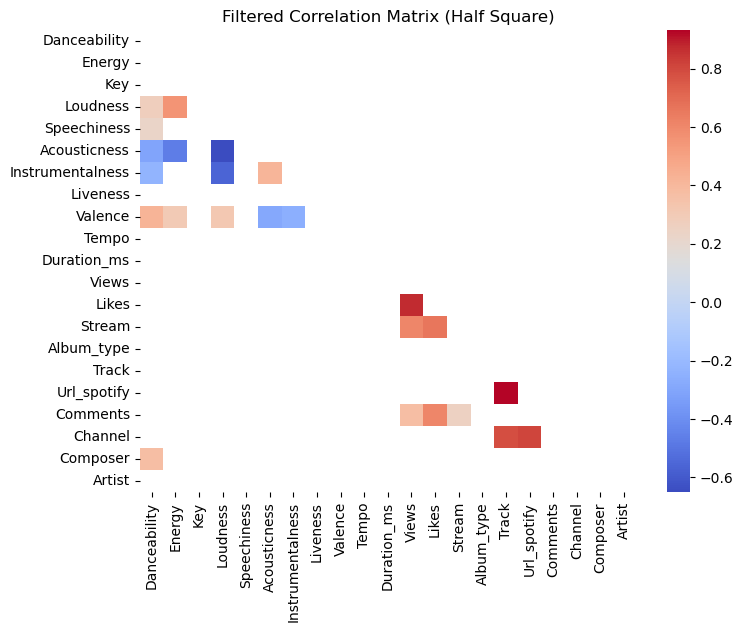

In [18]:
corr_matrix_with_threshold(df_train_embedding_important, 0.2)

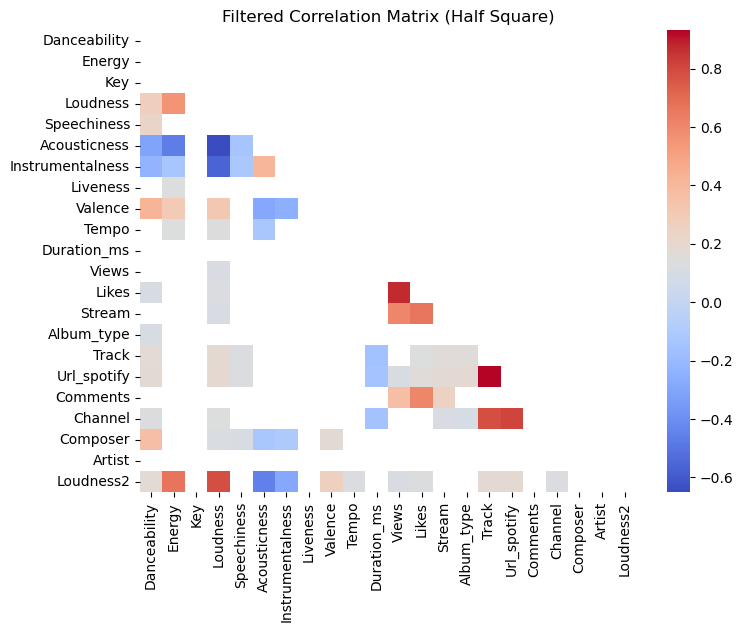

In [48]:
import math

def convert_decibel_to_numerical(dB_value):
    return 10**(dB_value / 10)

def feature_combination(df):
    df_connecting_tmp = df.copy()
#     df_connecting_tmp['Extra1'] = df_connecting_tmp['Valence']  * df_connecting_tmp['Url_spotify'] 
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Instrumentalness']
#     df_connecting_tmp['Extra3'] = df_connecting_tmp['Channel']  * df_connecting_tmp['Acousticness']
#     df_connecting_tmp['Extra2'] = df_connecting_tmp['Instrumentalness']  * df_connecting_tmp['Channel']
    df_connecting_tmp['Loudness2'] = df_connecting_tmp['Loudness'].apply(lambda x: convert_decibel_to_numerical(x)) 
    return df_connecting_tmp

df_train_feature_combination = feature_combination(df_train_embedding_important)
df_test_feature_combination = feature_combination(df_test_embedding_important)
corr_matrix_with_threshold(df_train_feature_combination, 0.1)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

In [205]:
# arr_NOT_important_column = [ 'Loudness', 'Url_spotify', 'Channel', 'Tempo', "Composer", 'Likes', 'Stream', 'Energy', 'Views', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Artist', 'Composer'  ]
arr_NOT_important_column = [ 'Loudness', 'Channel', "Composer", 'Track', 'Album_type', 'Comments','Artist', 'Composer'  ]
# Without Feature Combination
# df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
# df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

# With Feature Combination
df_train_embedding_important_simple = remove_unimportant_column(df_train_feature_combination, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_feature_combination, arr_NOT_important_column)

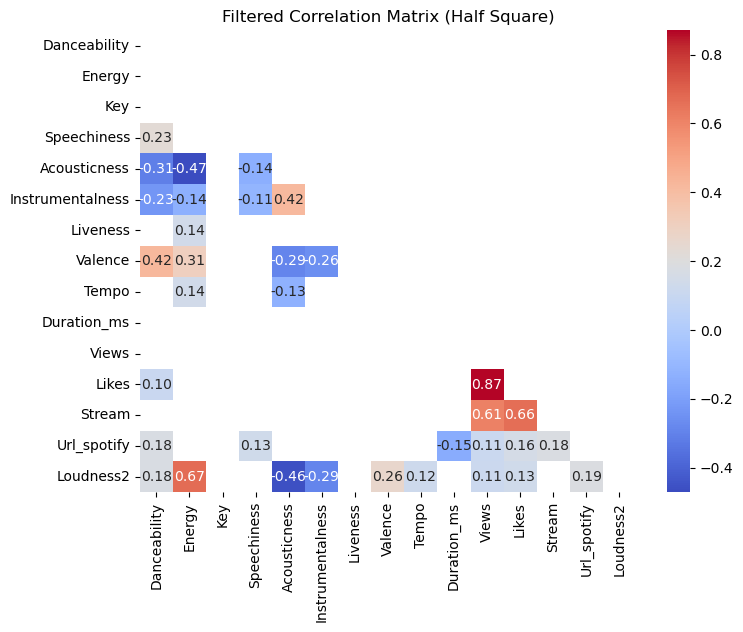

In [206]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

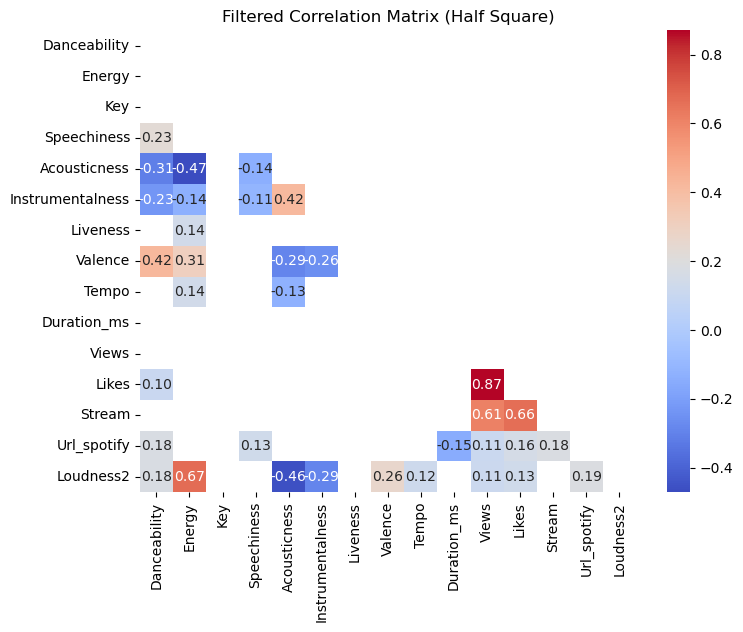

In [207]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.1)

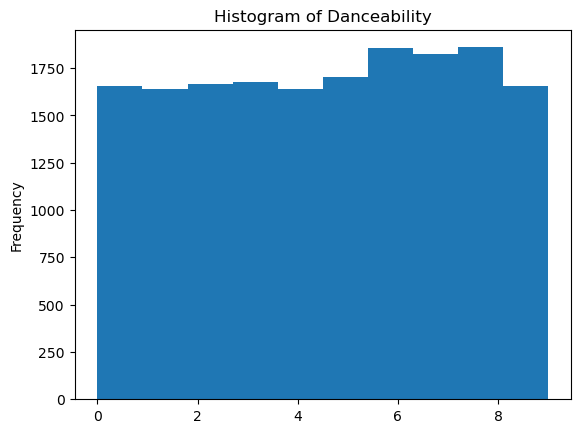

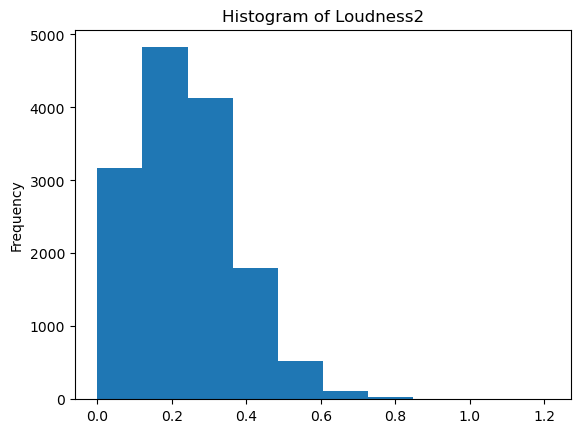

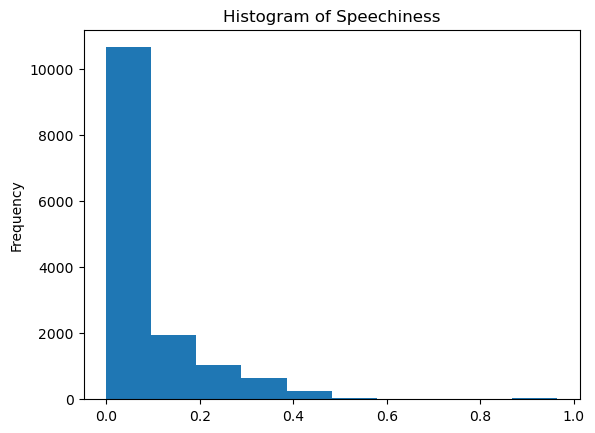

In [208]:
import matplotlib.pyplot as plt
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
plot_hist(df_train_embedding_important_simple, 'Danceability')
# plot_hist(df_train_embedding_important_simple, 'Loudness')
plot_hist(df_train_embedding_important_simple, 'Loudness2')
plot_hist(df_train_embedding_important_simple, 'Speechiness')


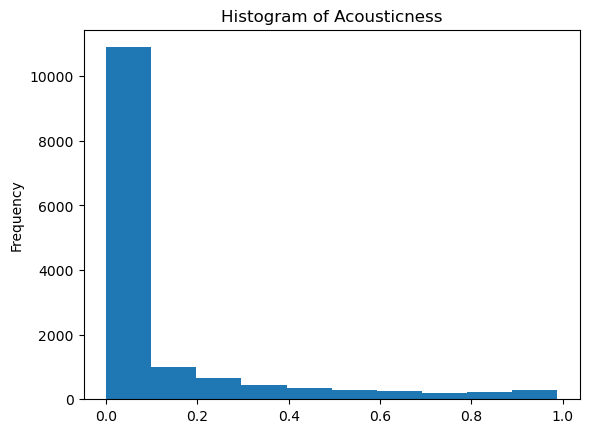

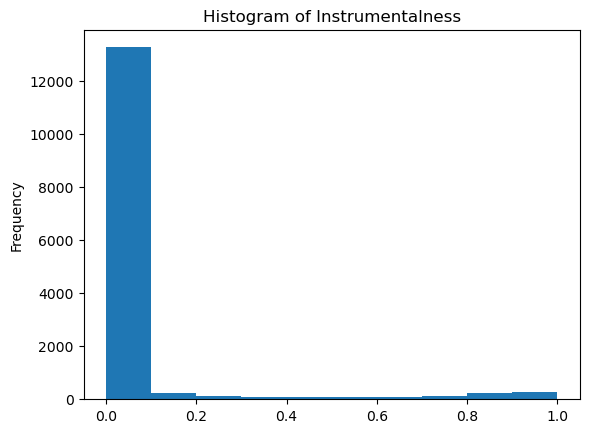

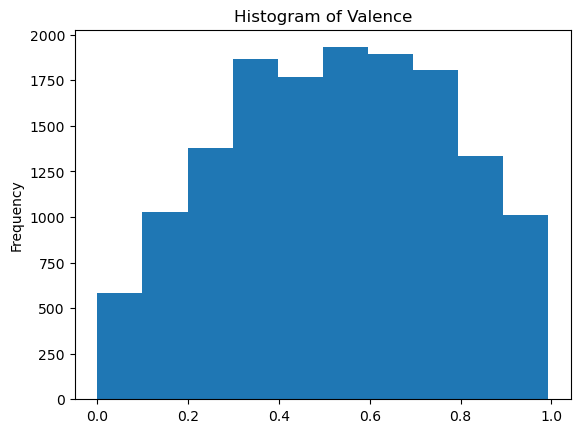

In [209]:
plot_hist(df_train_embedding_important_simple, 'Acousticness')
plot_hist(df_train_embedding_important_simple, 'Instrumentalness')
plot_hist(df_train_embedding_important_simple, 'Valence')


In [210]:
# plot_hist(df_train_embedding_important_simple, 'Likes')
# plot_hist(df_train_embedding_important_simple, 'Stream')
# plot_hist(df_train_embedding_important_simple, 'Channel')

In [211]:
min(df_train_embedding_important_simple['Loudness2'].values)

2.3708277395462832e-05

In [212]:
max(df_train_embedding_important_simple['Loudness2'].values)

1.210319415118767

In [213]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))


Clean Data without NaN: 1774
Data with NaN: 15396


# Imputation "Composer" START

### Using df_with_clean_data (7k-ish) as training for guessing NaN values 

In [214]:
df_for_training_imputation = df_with_clean_data.copy()
df_for_training_imputation

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
11,3.0,0.629423,5.0,0.0589,2.781813e-08,0.000002,0.022906,0.759,96.231,260400.0,86252134.0,357275.0,53372857.0,1.0,0.303879
12,2.0,0.144703,6.0,0.0341,5.088448e-03,0.000000,0.002406,0.291,156.207,204640.0,26341526.0,83668.0,45956641.0,1.0,0.185780
20,0.0,0.036265,8.0,0.0648,8.439086e-01,0.026300,0.046268,0.576,170.721,162286.0,19436.0,1119.0,9516698.0,3.0,0.050664
21,1.0,0.013312,6.0,0.0334,7.660609e-01,0.807000,0.001861,0.082,117.069,217606.0,706018.0,7201.0,19457528.0,3.0,0.032092
24,8.0,0.529475,4.0,0.2510,8.693831e-02,0.001750,0.000230,0.737,83.011,231240.0,60823771.0,403945.0,220334731.0,4.0,0.210911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17102,6.0,0.356401,1.0,0.0433,5.443994e-08,0.000054,0.036926,0.538,117.941,177187.0,190112394.0,2408257.0,226258788.0,1817.0,0.382913
17119,1.0,0.278445,1.0,0.0353,4.826809e-06,0.816000,0.000559,0.413,116.229,70029.0,306176.0,4860.0,2260622.0,1818.0,0.045530
17138,6.0,0.273359,10.0,0.0575,6.545083e-02,0.000000,0.002147,0.111,92.903,155239.0,7232329.0,85339.0,19437626.0,1820.0,0.317395
17146,5.0,0.075687,7.0,0.0494,1.851930e-04,0.000000,0.006435,0.782,143.894,187929.0,12357927.0,96287.0,17837493.0,1821.0,0.063241


In [215]:
df_for_training_imputation_non_danceability = df_for_training_imputation.iloc[:,1:]
df_for_training_imputation_non_danceability

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
11,0.629423,5.0,0.0589,2.781813e-08,0.000002,0.022906,0.759,96.231,260400.0,86252134.0,357275.0,53372857.0,1.0,0.303879
12,0.144703,6.0,0.0341,5.088448e-03,0.000000,0.002406,0.291,156.207,204640.0,26341526.0,83668.0,45956641.0,1.0,0.185780
20,0.036265,8.0,0.0648,8.439086e-01,0.026300,0.046268,0.576,170.721,162286.0,19436.0,1119.0,9516698.0,3.0,0.050664
21,0.013312,6.0,0.0334,7.660609e-01,0.807000,0.001861,0.082,117.069,217606.0,706018.0,7201.0,19457528.0,3.0,0.032092
24,0.529475,4.0,0.2510,8.693831e-02,0.001750,0.000230,0.737,83.011,231240.0,60823771.0,403945.0,220334731.0,4.0,0.210911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17102,0.356401,1.0,0.0433,5.443994e-08,0.000054,0.036926,0.538,117.941,177187.0,190112394.0,2408257.0,226258788.0,1817.0,0.382913
17119,0.278445,1.0,0.0353,4.826809e-06,0.816000,0.000559,0.413,116.229,70029.0,306176.0,4860.0,2260622.0,1818.0,0.045530
17138,0.273359,10.0,0.0575,6.545083e-02,0.000000,0.002147,0.111,92.903,155239.0,7232329.0,85339.0,19437626.0,1820.0,0.317395
17146,0.075687,7.0,0.0494,1.851930e-04,0.000000,0.006435,0.782,143.894,187929.0,12357927.0,96287.0,17837493.0,1821.0,0.063241


## Imputer using KNN
### Naturally works well with continous range of target label

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
def generate_model_for_imputation_nan_with_KNN(df, important_columns, target_column):
    print("Target", target_column)
    print("Supporting", important_columns)
    y = df[target_column]
    X = df.drop(target_column, axis=1)
    X = X[important_columns]
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = KNeighborsRegressor(n_neighbors=20)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
#     print(predictions)
#     print("Avg", np.mean(y_test))
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse) 
    print("------------------------------")
    # Calculate the accuracy of the model
    return model

arr_model = []
for target in df_for_training_imputation_non_danceability.columns:
    non_target = df_for_training_imputation_non_danceability.columns.drop([target])
    model = generate_model_for_imputation_nan_with_KNN(
        df_for_training_imputation_non_danceability, 
        non_target, 
        target
    )
    arr_model.append(model)


Target Energy
Supporting Index(['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Url_spotify', 'Loudness2'],
      dtype='object')
Mean Squared Error: 0.058037834738426955
------------------------------
Target Key
Supporting Index(['Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Url_spotify', 'Loudness2'],
      dtype='object')
Mean Squared Error: 12.21630281690141
------------------------------
Target Speechiness
Supporting Index(['Energy', 'Key', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream',
       'Url_spotify', 'Loudness2'],
      dtype='object')
Mean Squared Error: 0.010124000246056338
------------------------------
Target Acousticness
Supporting Index(['Energy', 'Key', 'Speechiness', 'Instrumentalness', 'Livene

## Start the imputation proces for every important features

In [217]:
df_train_embedding_important_simple_with_nan = df_train_embedding_important_simple.drop(df_with_clean_data.index)
df_train_embedding_important_simple_with_nan.head(10)

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
0,0.0,0.000273,3.0,0.0443,7.241508e-01,0.000062,0.000807,0.340,83.398,117907.0,NaN,137622.0,19981370.0,0.0,0.003037
1,0.0,0.184220,7.0,NaN,6.722214e-01,0.910000,0.034966,0.746,148.692,173427.0,184825.0,5190.0,NaN,0.0,NaN
2,0.0,NaN,6.0,NaN,6.676276e-01,0.867000,0.001772,0.380,84.899,150667.0,184825.0,5190.0,19320810.0,0.0,0.027568
3,1.0,0.209585,NaN,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,265000.0,202457327.0,997035.0,399661898.0,1.0,0.237083
4,4.0,NaN,5.0,0.0260,3.048625e-06,0.000467,0.002924,0.295,97.997,263867.0,316688049.0,1299086.0,NaN,1.0,NaN
5,6.0,0.442451,7.0,0.0326,1.757600e-05,0.000000,0.000944,0.842,103.032,260560.0,249074.0,922.0,201457474.0,1.0,NaN
6,0.0,0.225867,10.0,0.0323,2.914342e-01,0.000011,0.010794,NaN,166.668,258027.0,76758188.0,252380.0,136332369.0,1.0,NaN
7,6.0,0.494914,10.0,0.0414,4.983603e-05,0.000000,0.000334,0.879,116.043,NaN,105107732.0,740856.0,140211873.0,1.0,0.217270
8,1.0,0.898632,10.0,NaN,4.826809e-12,NaN,0.000623,0.347,125.152,262000.0,22878351.0,93766.0,128201040.0,1.0,0.314630
9,5.0,NaN,NaN,0.0261,7.895359e-02,NaN,0.005268,0.677,106.191,170493.0,44458549.0,276258.0,105775598.0,NaN,NaN


In [218]:
np.sum(np.isnan(df_train_embedding_important_simple_with_nan['Loudness2']))

2569

In [267]:
# df_train_embedding_important_simple_imputed = pd.DataFrame(imputed_data, columns=df_train_embedding_important_simple.columns)

concat_all_for_imputer = pd.concat([df_train_embedding_important_simple.iloc[:,1:], df_test_embedding_important_simple])
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,1.376220e+05,1.998137e+07,0.0,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,0.0,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,0.0,0.027568
3,0.209585,NaN,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,1.0,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,209,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,1631,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,1937,0.262570
6313,0.204440,NaN,0.037676,0.003631,0.491785,0.030605,0.482987,NaN,180639.352865,1.728134e+07,NaN,1.199593e+08,1689,0.069760


## Process Imputer which cannot use KNN:
## Key => mean()
## Tempo => mean()
## Duration_ms => mean()
## Views => mean() ????
## Likes => mean() ???
## Stream => mean() ???
## Url_spotify => 0

In [271]:
mean = np.mean(concat_all_for_imputer['Key'])
concat_all_for_imputer['Key'] = concat_all_for_imputer['Key'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Tempo'])
concat_all_for_imputer['Tempo'] = concat_all_for_imputer['Tempo'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Duration_ms'])
concat_all_for_imputer['Duration_ms'] = concat_all_for_imputer['Duration_ms'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Views'])
concat_all_for_imputer['Views'] = concat_all_for_imputer['Views'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Likes'])
concat_all_for_imputer['Likes'] = concat_all_for_imputer['Likes'].fillna(np.rint(mean))

mean = np.mean(concat_all_for_imputer['Stream'])
concat_all_for_imputer['Stream'] = concat_all_for_imputer['Stream'].fillna(np.rint(mean))

concat_all_for_imputer['Url_spotify'] = concat_all_for_imputer['Tempo'].fillna(0)


In [272]:
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,8.748155e+07,1.376220e+05,1.998137e+07,83.398000,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,1.304275e+08,148.692000,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,84.899000,0.027568
3,0.209585,5.0,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,150.220000,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,1.304275e+08,97.997000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,72.136829,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,119.000000,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,87.969239,0.262570
6313,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,6.310600e+05,1.199593e+08,119.000000,0.069760


In [270]:
concat_all_for_imputer

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,1.376220e+05,1.998137e+07,0.0,0.003037
1,0.184220,7.0,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,0.0,NaN
2,NaN,6.0,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,0.0,0.027568
3,0.209585,5.0,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,1.0,0.237083
4,NaN,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,209,0.230840
6311,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,1631,0.384719
6312,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,1937,0.262570
6313,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,NaN,180639.352865,1.728134e+07,NaN,1.199593e+08,1689,0.069760


In [273]:
from sklearn.impute import KNNImputer
import pandas as pd
imputer = KNNImputer(n_neighbors=3)


In [274]:
imputed_data = imputer.fit_transform(concat_all_for_imputer)
imputed_df = pd.DataFrame(imputed_data, columns=df_test_embedding_important_simple.columns)
imputed_df

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2
0,0.000273,3.0,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,8.748155e+07,1.376220e+05,1.998137e+07,83.398000,0.003037
1,0.184220,7.0,0.185267,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,1.304275e+08,148.692000,0.125700
2,0.266445,6.0,0.061167,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,84.899000,0.027568
3,0.209585,5.0,0.027700,0.003796,0.000968,0.001000,0.406469,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,150.220000,0.237083
4,0.325661,5.0,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,1.304275e+08,97.997000,0.307297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,7.0,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,72.136829,0.230840
23481,0.318585,10.0,0.073000,0.007420,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,119.000000,0.384719
23482,0.426223,5.0,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,87.969239,0.262570
23483,0.204440,5.0,0.037676,0.003631,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,6.310600e+05,1.199593e+08,119.000000,0.069760


In [275]:
def convert_to_decibel(value):
    if value == 0:
        return float('-inf')
    else:
        return 10 * math.log10(value)
imputed_df['Loudness3'] = imputed_df['Loudness2'].apply(convert_to_decibel)

In [276]:
train_imputed_only_x = imputed_df.iloc[:len(df_train_embedding_important_simple),:]
train_imputed_loudness = pd.concat([df_train_embedding_important_simple.iloc[:,:1], train_imputed_only_x], axis=1)
train_imputed_loudness

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2,Loudness3
0,0.0,0.000273,3.0,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,117907.0,87481554.0,137622.0,19981370.0,83.398,0.003037,-25.176000
1,0.0,0.184220,7.0,0.185267,6.722214e-01,0.910000,0.034966,0.746000,148.692,173427.0,184825.0,5190.0,130427491.0,148.692,0.125700,-9.006641
2,0.0,0.266445,6.0,0.061167,6.676276e-01,0.867000,0.001772,0.380000,84.899,150667.0,184825.0,5190.0,19320810.0,84.899,0.027568,-15.596000
3,1.0,0.209585,5.0,0.027700,3.796416e-03,0.000968,0.001000,0.406469,150.220,265000.0,202457327.0,997035.0,399661898.0,150.220,0.237083,-6.251000
4,4.0,0.325661,5.0,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,263867.0,316688049.0,1299086.0,130427491.0,97.997,0.307297,-5.124413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,94667.0,87481554.0,1113.0,130427491.0,90.002,0.232060,-6.344000
17166,2.0,0.820026,4.0,0.111367,2.195200e-05,0.000000,0.000786,0.657000,174.869,150857.0,164741.0,2019.0,10898176.0,174.869,0.662827,-1.786000
17167,1.0,0.571787,4.0,0.064700,1.923052e-02,0.000000,0.003652,0.419000,168.388,136842.0,35646.0,329.0,130427491.0,168.388,0.340487,-4.679000
17168,1.0,0.451218,9.0,0.419000,4.511802e-02,0.410027,0.001260,0.539000,155.378,108387.0,6533.0,631060.0,6873961.0,155.378,0.014078,-18.514563


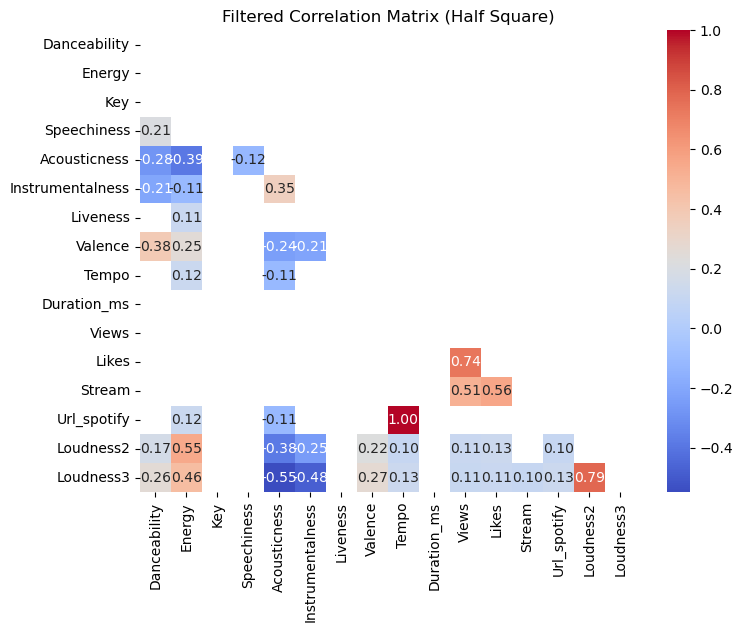

In [277]:
corr_matrix_with_threshold(train_imputed_loudness, 0.1)

In [278]:
test_imputed_loudness = imputed_df.iloc[len(df_train_embedding_important_simple):,:].reset_index(drop=True)
test_imputed_loudness

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness2,Loudness3
0,0.350403,6.0,0.177000,5.842771e-07,0.002330,0.230346,0.507000,138.559000,222640.000000,6.935552e+08,6.220896e+06,1.040235e+09,138.559000,0.214833,-6.679000
1,0.347429,8.0,0.030200,2.529271e-02,0.000687,0.000099,0.852000,92.761000,200173.000000,7.201164e+07,6.310600e+05,3.100837e+08,92.761000,0.262120,-5.815000
2,0.786330,1.0,0.052200,7.676563e-05,0.026457,0.001561,0.551000,108.014000,215150.000000,8.435055e+06,2.821420e+05,6.306347e+07,108.014000,0.404576,-3.930000
3,0.403583,2.0,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,233867.000000,8.748155e+07,1.788577e+06,4.346636e+08,120.423000,0.262422,-5.810000
4,0.334255,5.0,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,340920.000000,6.184810e+08,6.197318e+06,6.172597e+08,167.953000,0.137183,-8.627000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,72.136829,0.230840,-6.366894
6311,0.318585,10.0,0.073000,7.419596e-03,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,119.000000,0.384719,-4.148566
6312,0.426223,5.0,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,87.969239,0.262570,-5.807545
6313,0.204440,5.0,0.037676,3.630868e-03,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,6.310600e+05,1.199593e+08,119.000000,0.069760,-11.563964


In [279]:
arr_NOT_important_column = [ 'Loudness2']

train_imputed = remove_unimportant_column(train_imputed_loudness, arr_NOT_important_column)
test_imputed = remove_unimportant_column(test_imputed_loudness, arr_NOT_important_column)

In [280]:
train_imputed

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness3
0,0.0,0.000273,3.0,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,117907.0,87481554.0,137622.0,19981370.0,83.398,-25.176000
1,0.0,0.184220,7.0,0.185267,6.722214e-01,0.910000,0.034966,0.746000,148.692,173427.0,184825.0,5190.0,130427491.0,148.692,-9.006641
2,0.0,0.266445,6.0,0.061167,6.676276e-01,0.867000,0.001772,0.380000,84.899,150667.0,184825.0,5190.0,19320810.0,84.899,-15.596000
3,1.0,0.209585,5.0,0.027700,3.796416e-03,0.000968,0.001000,0.406469,150.220,265000.0,202457327.0,997035.0,399661898.0,150.220,-6.251000
4,4.0,0.325661,5.0,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,263867.0,316688049.0,1299086.0,130427491.0,97.997,-5.124413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,94667.0,87481554.0,1113.0,130427491.0,90.002,-6.344000
17166,2.0,0.820026,4.0,0.111367,2.195200e-05,0.000000,0.000786,0.657000,174.869,150857.0,164741.0,2019.0,10898176.0,174.869,-1.786000
17167,1.0,0.571787,4.0,0.064700,1.923052e-02,0.000000,0.003652,0.419000,168.388,136842.0,35646.0,329.0,130427491.0,168.388,-4.679000
17168,1.0,0.451218,9.0,0.419000,4.511802e-02,0.410027,0.001260,0.539000,155.378,108387.0,6533.0,631060.0,6873961.0,155.378,-18.514563


In [282]:
test_imputed

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness3
0,0.350403,6.0,0.177000,5.842771e-07,0.002330,0.230346,0.507000,138.559000,222640.000000,6.935552e+08,6.220896e+06,1.040235e+09,138.559000,-6.679000
1,0.347429,8.0,0.030200,2.529271e-02,0.000687,0.000099,0.852000,92.761000,200173.000000,7.201164e+07,6.310600e+05,3.100837e+08,92.761000,-5.815000
2,0.786330,1.0,0.052200,7.676563e-05,0.026457,0.001561,0.551000,108.014000,215150.000000,8.435055e+06,2.821420e+05,6.306347e+07,108.014000,-3.930000
3,0.403583,2.0,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,233867.000000,8.748155e+07,1.788577e+06,4.346636e+08,120.423000,-5.810000
4,0.334255,5.0,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,340920.000000,6.184810e+08,6.197318e+06,6.172597e+08,167.953000,-8.627000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,7.0,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,72.136829,-6.366894
6311,0.318585,10.0,0.073000,7.419596e-03,0.000817,0.008843,0.614366,119.000000,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,119.000000,-4.148566
6312,0.426223,5.0,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,87.969239,-5.807545
6313,0.204440,5.0,0.037676,3.630868e-03,0.491785,0.030605,0.482987,119.000000,180639.352865,1.728134e+07,6.310600e+05,1.199593e+08,119.000000,-11.563964


# Imputation "Composer" END

In [283]:
# Make the clean data to give strength to the dataset
# duplicate 2x to the data training
# so it should dominate the dataset

# df_train_embedding_important_simple_added = pd.concat([
#     df_train_embedding_important_simple, 
#     df_with_clean_data,
#     df_with_clean_data,
#     df_with_clean_data,
#     df_with_clean_data,
#     df_with_clean_data,
#     df_with_clean_data,
# ]).sample(frac=1).reset_index(drop=True)

# print("After merging Clean data with distorted data:", len(df_train_embedding_important_simple_added))

In [284]:
# def conditioning(df):
#     df_ret = df.copy()
#     df_ret['Stream'] = np.log(df_ret['Stream'])
#     df_ret[df_ret['Stream'] == -np.inf] = 0

#     df_ret['Likes'] = np.log(df_ret['Likes'])
#     df_ret[df_ret['Likes'] == -np.inf] = 0

#     df_ret['Instrumentalness'] = np.log(np.abs(df_ret['Instrumentalness']))
#     df_ret[df_ret['Instrumentalness'] == -np.inf] = 0

#     df_ret['Loudness'] = np.log(np.abs(df_ret['Loudness']))
#     df_ret[df_ret['Loudness'] == -np.inf] = 0
    
#     df_ret['Acousticness'] = np.log(np.abs(df_ret['Acousticness']))
#     df_ret[df_ret['Acousticness'] == -np.inf] = 0
    
#     return df_ret

# # df_train_embedding_important_simple_added_conditioning = conditioning(df_train_embedding_important_simple_added)
# # df_test_embedding_important_simple_added_conditioning = conditioning(df_test_embedding_important_simple)

# df_train_embedding_important_simple_added_conditioning = df_train_embedding_important_simple_added
# df_test_embedding_important_simple_added_conditioning = df_test_embedding_important_simple

In [285]:
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Instrumentalness')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Likes')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Stream')


In [286]:
# def imputer(df):
#     df_ret = df.copy()
#     mean_values =  df['Valence'].mean()
#     df_ret['Valence'] = df['Valence'].fillna(mean_values)

#     mean_values = df['Loudness'].mean()
#     df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
#     mean_values = df['Speechiness'].mean()
#     df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    
#     mean_values = df['Acousticness'].mean()
#     df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    
#     mean_values = df['Instrumentalness'].mean()
#     df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)

#     df_ret['Composer'] = df['Composer'].fillna(0)

#     return df_ret


# df_train_embedding_important_simple_imputer_before_scaler = imputer(df_train_embedding_important_simple_added_conditioning)    
# df_test_embedding_important_simple_imputer_before_scaler = imputer(df_test_embedding_important_simple_added_conditioning)    


In [287]:
# from sklearn.preprocessing import StandardScaler

# def scaler(df_train, df_test):
#     df_train_non_y = df_train.iloc[:, 1:]
#     df_train_y = df_train.iloc[:, :1]
#     len_train = len(df_train_non_y)
#     print(len_train)
#     df_concatenated = pd.concat([
#         df_train_non_y, df_test
#     ]).reset_index(drop=True)
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(df_concatenated)
#     df_train_scaled_non_y = pd.DataFrame(X_scaled[:len_train,:], columns=df_concatenated.columns)
#     df_train_scaled_with_y = pd.concat([df_train_y, df_train_scaled_non_y], axis=1)
#     df_test_scaled = pd.DataFrame(X_scaled[len_train:,:], columns=df_concatenated.columns)
#     return df_train_scaled_with_y, df_test_scaled
# df_train_embedding_important_simple_imputer, df_test_embedding_important_simple_imputer = scaler(df_train_embedding_important_simple_imputer_before_scaler, df_test_embedding_important_simple_imputer_before_scaler)

In [288]:
# print(df_train_embedding_important_simple_imputer_before_scaler)
# print(df_train_embedding_important_simple_imputer)

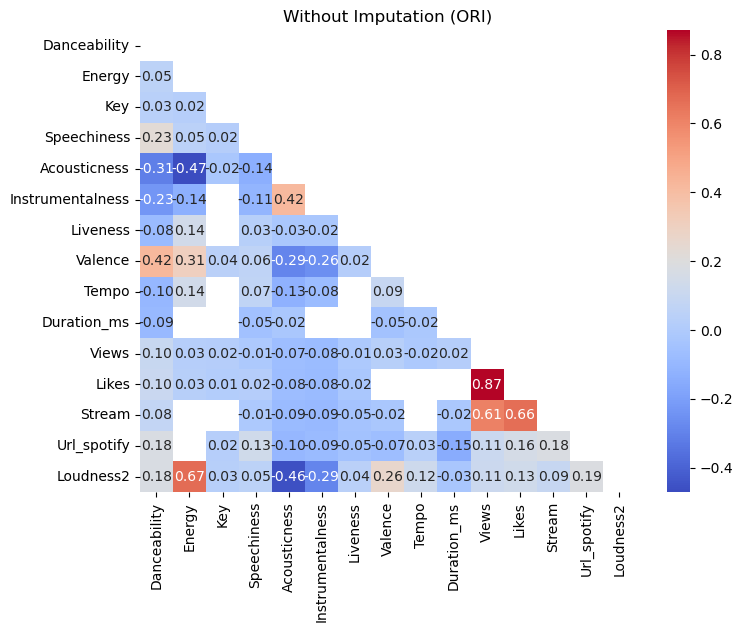

In [289]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation (ORI)')


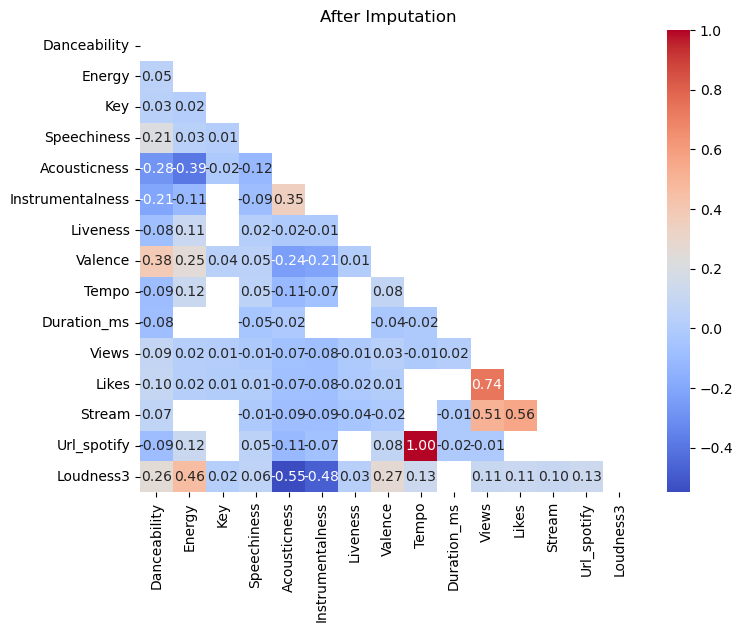

In [290]:
corr_matrix_with_threshold(train_imputed, 0.01, 'After Imputation')

In [291]:
from sklearn.model_selection import train_test_split
# train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(train_imputed.iloc[:, 1:], train_imputed.iloc[:, :1], test_size = 0.20, random_state = 42)

In [292]:
train_features

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness3
11068,0.237177,7.0,0.411000,4.295064e-03,0.000000,0.006435,0.627000,119.000,225131.0,52432531.0,443985.0,7.608292e+07,119.000,-4.364000
16278,0.264609,7.0,0.287000,8.489664e-06,0.000000,0.000285,0.380333,179.974,131240.0,417959685.0,4372136.0,1.087264e+09,179.974,-6.257000
14511,0.895841,7.0,0.071800,9.910270e-13,0.000003,0.001443,0.592333,138.021,229773.0,58394962.0,499067.0,1.104720e+08,138.021,-3.673000
13237,0.097972,5.0,0.035000,3.256607e-01,0.065932,0.024389,0.358000,79.035,211067.0,3196466.0,631060.0,3.976863e+07,79.035,-4.421991
12870,0.500566,7.0,0.038500,1.968300e-02,0.000023,0.001953,0.532000,140.952,241893.0,87481554.0,631060.0,1.600666e+08,140.952,-5.777671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.139798,0.0,0.167000,3.342554e-04,0.000020,0.001685,0.772000,107.990,225131.0,33106049.0,631060.0,1.304275e+08,107.990,-5.783000
11964,0.121287,2.0,0.036200,4.763795e-01,0.000000,0.000689,0.244000,119.000,291462.0,82725559.0,631060.0,8.574645e+07,119.000,-7.717943
5390,0.538525,0.0,0.276000,7.895359e-02,0.000000,0.003870,0.625000,85.114,233688.0,2726569.0,631060.0,1.676971e+07,85.114,-5.569000
860,0.125752,0.0,0.167000,3.701462e-01,0.000000,0.016975,0.509000,179.615,107267.0,1292138.0,4618.0,3.888396e+07,179.615,-12.861000


In [293]:
train_labels

,Danceability
11068,9.0
16278,7.0
14511,2.0
13237,2.0
12870,6.0
...,...
11284,9.0
11964,3.0
5390,1.0
860,4.0


In [294]:
val_features

,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness3
3706,0.024642,7.0,0.0368,0.525558,0.000000,0.042875,0.305,73.638,242960.0,1440157.0,631060.0,130427491.0,73.638,-9.930
2518,0.015253,10.0,0.0306,0.061177,0.000000,0.001191,0.119,137.920,225131.0,28007350.0,177518.0,18082097.0,137.920,-10.553
6959,0.075687,10.0,0.0324,0.099897,0.000000,0.001331,0.509,131.903,225131.0,108416965.0,631060.0,50414439.0,131.903,-8.702
5396,0.827936,0.0,0.0475,0.000097,0.000000,0.001405,0.684,116.044,221947.0,450948690.0,2588370.0,130427491.0,116.044,-4.282
13691,0.352015,2.0,0.0664,0.050336,0.000000,0.001331,0.611,176.089,228169.0,88877.0,2684.0,130427491.0,176.089,-4.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,0.504358,6.0,0.0330,0.007189,0.000000,0.016196,0.924,140.072,166436.0,163676870.0,784015.0,130427491.0,140.072,-4.611
15205,0.389017,0.0,0.1340,0.001260,0.005290,0.007301,0.421,91.966,212304.0,87481554.0,248798.0,141715807.0,91.966,-3.865
7654,0.410172,3.0,0.0414,0.014706,0.000021,0.000597,0.645,140.030,166929.0,1012364.0,9819.0,5711512.0,140.030,-7.146
6141,0.822657,10.0,0.2860,0.003949,0.000000,0.193341,0.749,132.067,219493.0,87481554.0,26399133.0,370991124.0,132.067,-2.871


In [295]:
val_labels

,Danceability
3706,0.0
2518,0.0
6959,5.0
5396,3.0
13691,1.0
...,...
11569,7.0
15205,8.0
7654,7.0
6141,7.0


# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [296]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [297]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [298]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
#     pred = reg.predict(train_features)
#     accuracy = accuracy_score(np.ravel(train_labels), np.rint(pred))
#     mae = mean_absolute_error(np.ravel(train_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.297903,0.206174
ExtraTreesClassifier,1.855853,0.293535
LGBWrapper,1.701514,0.179674
RandomForestRegressor,1.711998,0.174432
RandomForestRegressor,1.712289,0.177053
XGBRegressor,1.763832,0.161328
OneVsOneClassifier,2.014851,0.228596


In [299]:
result_table


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.297903,0.206174
ExtraTreesClassifier,1.855853,0.293535
LGBWrapper,1.701514,0.179674
RandomForestRegressor,1.711998,0.174432
RandomForestRegressor,1.712289,0.177053
XGBRegressor,1.763832,0.161328
OneVsOneClassifier,2.014851,0.228596


In [300]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.20297029702970298


In [301]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.20297029702970298


In [248]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        train_imputed.iloc[:, 1:],                # Full X data
        np.ravel(train_imputed.iloc[:, :1])       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


In [250]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, test_imputed)


In [251]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [252]:
np.rint(predictionsTest)

array([6., 6., 5., ..., 2., 5., 8.])

# Start Cascade Level 1.5
## => Do "reinforcement" using last 7 submission (with high MAE)

In [302]:
df_hasil = pd.DataFrame()

tmp = pd.read_csv('old1.csv')
tmp = tmp.drop('id', axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)


In [303]:

for t in range(2,8):
    tmp = pd.read_csv('old'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, test_imputed ], axis=1)



In [304]:
pd_new_generated = pd.concat([train_imputed, concat_cheat, concat_cheat])
pd_new_generated = pd_new_generated.sample(frac=1).reset_index(drop=True)
pd_new_generated

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Url_spotify,Loudness3
0,3.0,0.153991,5.0,0.420000,0.360184,0.000000,0.005545,0.615667,107.277000,182160.000000,8.748155e+07,2.302000e+04,2.007481e+07,107.277000,-9.654000
1,1.0,0.576688,0.0,0.094593,0.013372,0.860019,0.033424,0.019637,79.959881,280804.548231,3.892526e+08,2.168475e+04,4.007246e+07,79.959881,-3.639626
2,8.0,0.250047,1.0,0.298000,0.000193,0.004790,0.000197,0.717000,95.000000,281600.000000,1.276815e+06,2.483100e+04,2.137452e+08,95.000000,-3.585000
3,0.0,0.027271,9.0,0.035233,0.454757,0.000000,0.017042,0.436000,65.488000,158680.000000,6.544598e+06,5.177900e+04,4.568383e+07,65.488000,-11.843000
4,6.0,0.279383,2.0,0.088591,0.032070,0.008267,0.001918,0.222666,131.789215,258363.362748,1.390357e+08,2.305689e+04,3.319593e+08,131.789215,-7.516965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29795,2.0,0.186922,0.0,0.054259,0.242241,0.029133,0.035655,0.681363,54.711230,192274.906860,4.069410e+06,-1.830963e+03,8.210346e+06,54.711230,-8.383480
29796,6.0,0.127264,10.0,0.835333,0.043905,0.000000,0.521660,0.574000,131.225000,180147.000000,9.020000e+02,3.000000e+00,2.996130e+05,131.225000,-11.606432
29797,3.0,0.026448,7.0,0.120255,0.022628,0.707727,0.044692,0.075042,110.130627,303293.564861,2.012536e+07,1.752436e+05,1.304275e+08,110.130627,-19.143334
29798,6.0,0.578010,7.0,0.304000,0.000019,0.000000,0.000035,0.661000,88.785000,313573.000000,2.127132e+08,1.529700e+06,6.950462e+08,88.785000,-4.215000


In [ ]:
# Train using Full Training dataset + slight-cheating majority from previous submission
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(pd_new_generated.iloc[:, 1:], np.ravel(pd_new_generated.iloc[:, :1]))    
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)


Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor


In [257]:
result_table

,mae,accuracy
regressors,,
DecisionTreeClassifier,0.000000,1.000000
ExtraTreesClassifier,0.000000,1.000000
LGBWrapper,1.559406,0.192778
RandomForestRegressor,0.587653,0.465638
RandomForestRegressor,0.588235,0.464182
XGBRegressor,1.753349,0.161910
OneVsOneClassifier,1.855271,0.251602


In [258]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.5051584990431816


In [259]:
result_table

,mae,accuracy
regressors,,
DecisionTreeClassifier,0.000000,1.000000
ExtraTreesClassifier,0.000000,1.000000
LGBWrapper,1.559406,0.192778
RandomForestRegressor,0.587653,0.465638
RandomForestRegressor,0.588235,0.464182
XGBRegressor,1.753349,0.161910
OneVsOneClassifier,1.855271,0.251602


In [260]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.5051584990431816


In [261]:
# Make ensemble predictions
ensemble_predictions_l2, all_predictions = ensemble_predict(regressors, test_imputed)


In [262]:
current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l2
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1.5_cascade_' + datetime_string + '.csv', index=False)

In [263]:
all_predictions.shape

(6315, 7)

# Start Cascade Level 2
## Main Feature: Key, Loudness, Tempo

## NB: This part still on progress

In [ ]:
arr_NOT_important_column_l2 = [ 'Energy', 'Valence', 'Album_type', 'Track', 'Comments', 'Channel', 'Composer', 'Artist', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important_l2 = remove_unimportant_column(df_train_embedding, arr_NOT_important_column_l2)
df_test_embedding_important_l2 = remove_unimportant_column(df_test_embedding, arr_NOT_important_column_l2)
df_train_embedding_important_l2

In [ ]:
df_train_embedding_important_l2_clean = df_train_embedding_important_l2.dropna()
df_train_embedding_important_l2_clean

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def imputer_l2(df):
    df_ret = df.copy()
    df_ret['Key'] = df['Key'].fillna(-1)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Tempo'].mean()
    df_ret['Tempo'] = df['Tempo'].fillna(mean_values)
    
    return df_ret


df_train_embedding_important_l2_clean_imputer = imputer_l2(df_train_embedding_important_l2_clean)    
df_test_embedding_important_simple_l2_imputer = imputer_l2(df_test_embedding_important_l2)    
print(df_train_embedding_important_l2_clean)
print(df_train_embedding_important_l2_clean_imputer)

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_l2_clean, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_l2_clean_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
train_features_l2, val_features_l2, train_labels_l2, val_labels_l2 = train_test_split(df_train_embedding_important_l2_clean_imputer.iloc[:, 1:], df_train_embedding_important_l2_clean_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_l2 = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_l2:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features_l2, np.ravel(train_labels_l2))
    pred = reg.predict(val_features_l2)
    accuracy = accuracy_score(np.ravel(val_labels_l2), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels_l2), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2